# Case Study: Erweiterung des Süßwarensortiments (Eigenmarke)

### Ziel

Die Auswirkung der Charakteristika von Süßwaren auf deren Beliebtheit analysieren und auf Basis dieser Analyse eine Empfehlung für die neue Süßigkeit abgeben.

### Datensatz

Datensatz enthält die folgenden Felder:

| Header | Description |
| :- | :- |
|chocolate|Enthält es Schokolade?|
|fruity|Hat es einen fruchtiger Geschmack?|
|caramel|Enthält es Karamell?|
|peanutalmondy|Enthält es Erdnüsse, Erdnussbutter oder Mandeln?|
|nougat|Enthält es Nougat?|
|crispedricewafer|Enthält es Knusper Reis, Waffeln oder Kekse?|
|hard|Ist es eine harte Süßigkeit?|
|bar|Handelt es sich um einen Riegel?|
|pluribus|Handelt es sich um eine von vielen Süßigkeiten in einer Tüte oder Schachtel?|
|sugarpercent|Das Perzentil des Zuckers, unter das die Süßigkeit innerhalb des Datensatzes fällt.|
|pricepercent|Der prozentuale Anteil des Stückpreises im Vergleich zum Rest des Datensatzes.|
|winpercent|Die Gesamtsiegquote nach 269.000 Matchups. Beliebtheit.| 

0 = Nein, 1 = Ja

### Modell Auswahl

- "White-box" Modell: Lineare Regression. 

    - Lineare Regression ermittelt den Beitrag der einzelnen Variablen zur endgültigen Vorhersage.

    - Hohe Interpretierbarkeit: Die Methode lässt sich leicht visualisieren und nachvollziehen.


- Kriterium (abhängige Variable): winpercent.

- Prädiktoren (unabhängige Variable): alle außer winpercent.


### Insights 

- **Schokolade und fruchtiger Geschmack sind gegeseitig ausschließend**: Es wird empfohlen, die Süßwaren entweder mit Schokolade oder Frucht Geschmack zuzubereiten, aber nicht mit beiden.
- Die 10 beliebtesten Süßigkeiten enthalten **Schokolade**, kein fruchtiger Geschmack, und sind auch nicht hart. 
- Die meisten der 10 am wenigsten beliebte Süßigkeiten sind **Bonbons** und eine von vielen Süßigkeiten **in einer Tüte oder Schachtel**. Sie enthalten keine Schokolade, Nüsse, Nougat, Kekse oder Knusper Reis.
- Preis: Mittelwert der beliebtesten Süßwaren ist 76%.
- Zucker: Mittelwert der beliebtesten Süßwaren ist im 68%.

- Die relevanteste Charakteristika der beliebten Süßigkeit sind:
    - Schokolade.
    - Fruchtiger Geschmack.
    - Höheren Zuckergehalt. Zwischen 60gr und 70gr per 100gr. (https://www.nutritionix.com/i/tootsie-roll/caramel-apple-pops/567222ace18ccbe270044a3e und https://www.nutritionix.com/i/chewy-lemonhead/fruit-mix/55918bf56685ca4f2edf12c5).
    - Höheren Preis. Zwischen 0.78 USD und 0.88 USD (https://www.walmart.com/ip/Crunch-Bar-1-55-oz/20918418 und https://www.walmart.com/browse/butterfinger/YnJhbmQ6QnV0dGVyZmluZ2Vy)
    - Nüsse. 
    
### Empfehlung für die neue Süßigkeit:

- Schokoriegel mit Nüsse.
- Zuckergehalt zwischen 60g und 70g per 100g des Produktes.
- Preis zwischen €0.67 und €0.76 (0.78 USD und 0.88 USD).


### Daten laden

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('candy-data.csv')

In [3]:
data.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [6]:
# Es gibt keine Missing Values
data.isna().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

### EDA

Die 10 beliebteste Süßigkeiten enthalten Schokolade. 

Die meisten der 10 am wenigsten beliebte Süßigkeiten sind Bonbons und eine von vielen Süßigkeiten in einer Tüte oder Schachtel. 

In [7]:
# 10 beliebteste Süßigkeiten:
data.sort_values('winpercent', ascending=False).head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [8]:
# 10 unbeliebteste Süßigkeiten:
data.sort_values('winpercent').head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


In [9]:
# Süßigkeiten zwischen 60% und 70% des Zuckers Anteil:
data[data['sugarpercent'] > 0.60][data['sugarpercent'] < 0.75].head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604,0.511,38.975037
11,Chewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,0.732,0.511,36.017628
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
14,Dum Dums,0,1,0,0,0,0,1,0,0,0.732,0.034,39.460556
16,Fun Dip,0,1,0,0,0,0,1,0,0,0.732,0.325,39.185505
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556


In [10]:
# Süßigkeiten zwischen 75% und 80% des Preises Anteil:
data[data['pricepercent'] > 0.75][data['pricepercent'] < 0.80]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641
43,Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313,0.767,66.470680
46,Payday,0,0,0,1,1,0,0,1,0,0.465,0.767,46.296597
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111


#### Inhalt

Früchte 45%, Schokolade 44%, Karamell 16%, Nüsse 16%, Nougat 8%, Knusper Reis, Waffeln oder Kekse 8%.

In [11]:
data.chocolate.value_counts(normalize=True)

0    0.564706
1    0.435294
Name: chocolate, dtype: float64

In [12]:
data.fruity.value_counts(normalize=True)

0    0.552941
1    0.447059
Name: fruity, dtype: float64

In [13]:
data.caramel.value_counts(normalize=True)

0    0.835294
1    0.164706
Name: caramel, dtype: float64

In [14]:
data.peanutyalmondy.value_counts(normalize=True)

0    0.835294
1    0.164706
Name: peanutyalmondy, dtype: float64

In [15]:
data.nougat.value_counts(normalize=True)

0    0.917647
1    0.082353
Name: nougat, dtype: float64

In [16]:
data.crispedricewafer.value_counts(normalize=True)

0    0.917647
1    0.082353
Name: crispedricewafer, dtype: float64

#### Form

Mehrere Süßigkeiten in einer Tüte 48%, Riegel 25%, hart 17%. 

In [17]:
data.hard.value_counts(normalize=True)

0    0.823529
1    0.176471
Name: hard, dtype: float64

In [18]:
data.bar.value_counts(normalize=True)

0    0.752941
1    0.247059
Name: bar, dtype: float64

In [19]:
data.pluribus.value_counts(normalize=True)

1    0.517647
0    0.482353
Name: pluribus, dtype: float64

#### Visualisierung

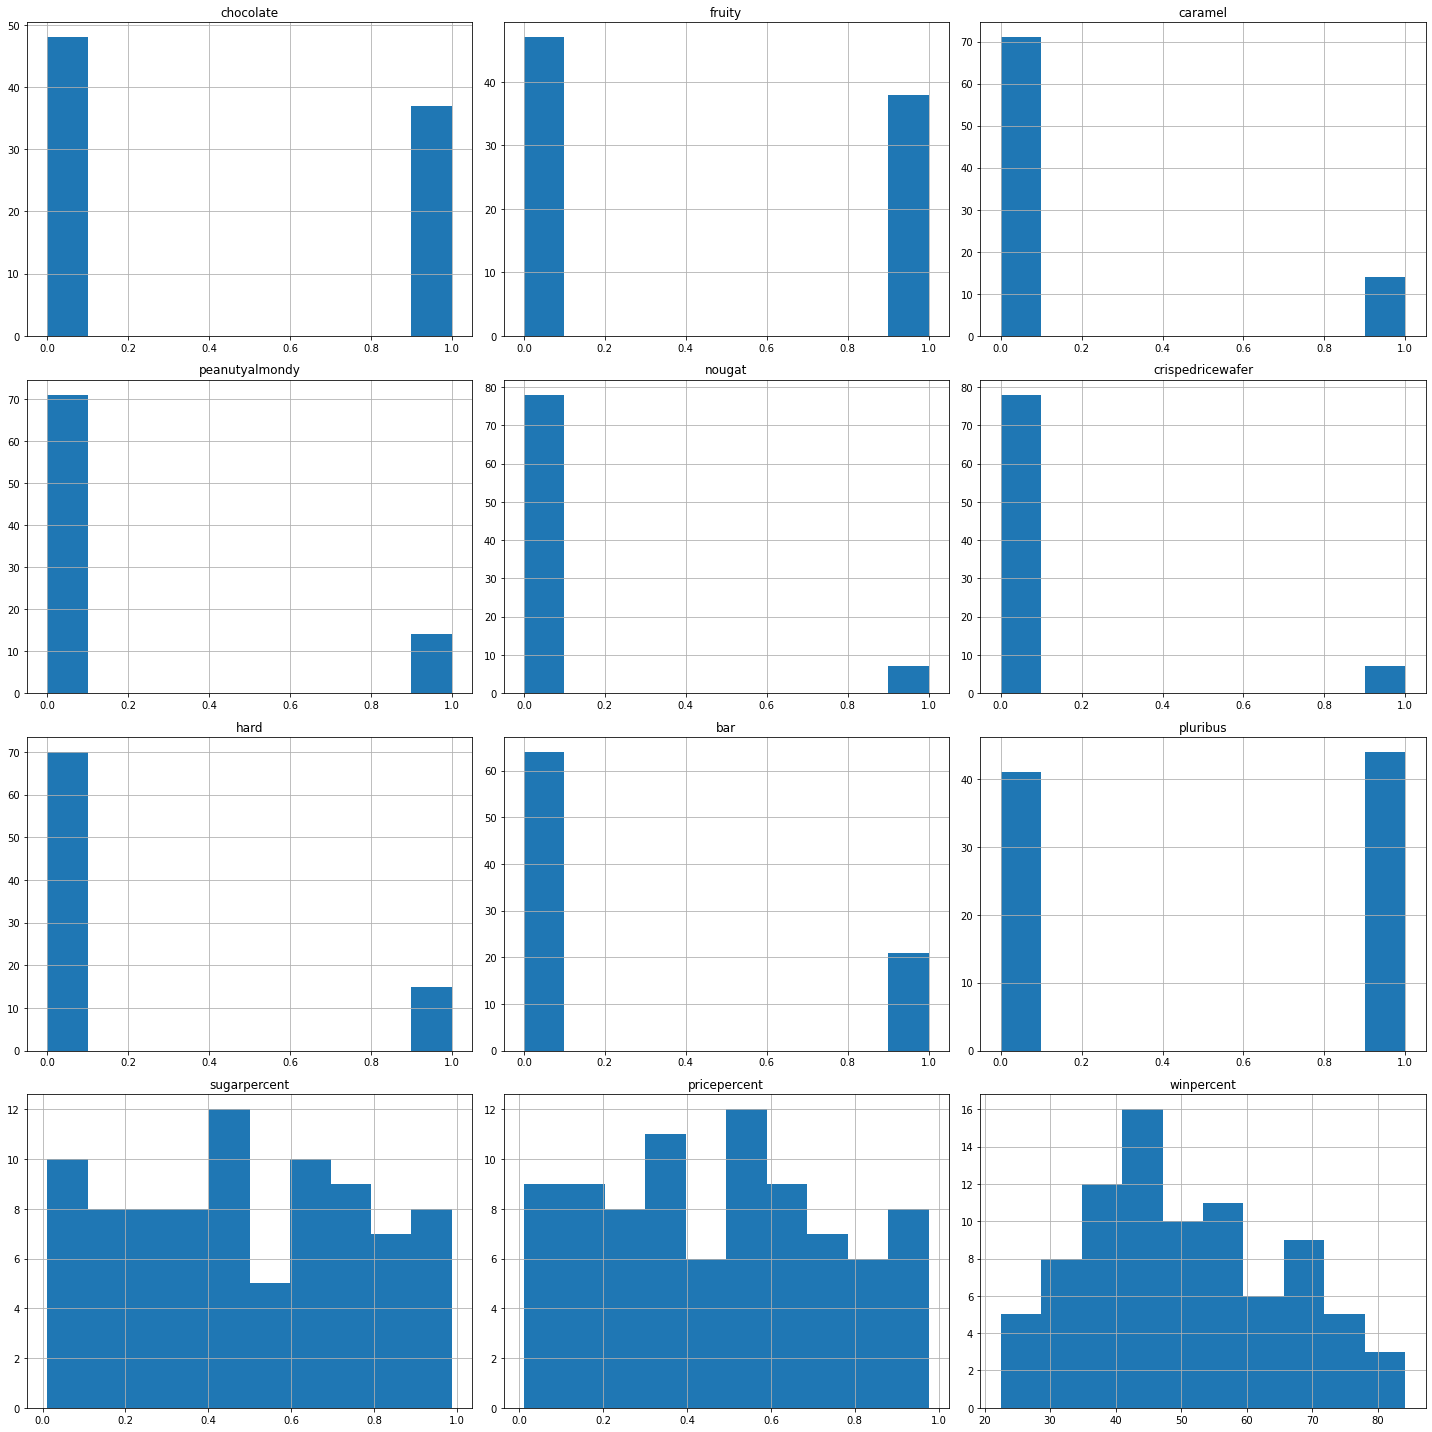

In [20]:
#Histograms
fig, ax = plt.subplots(figsize=(20, 20))
ax_ = data.hist(ax=ax)
plt.tight_layout()

#### Korrelation

**Negative Korrelationen**: 

- **Schokolade und fruchtiger Geschmack** sind gegenseitig ausschließend (Starke negative Korrelation, -0.74, das Anwachsen der Werte der einen Variable hat ein Abfallen der Werte der anderen Variable zur Folge): das eine schließt das andere aus. Deswegen, empfiehlt sich, die Süßwaren entweder mit Schokolade oder fruchtiger Geschmack zuzubereiten, aber nicht mit beiden.  

- Die negative Korrelation zwischen bar (Riegeln) und pluribus (eine von mehrere Süßigkeiten in einer Tüte) ist moderate, fast 0.6. 

**Positive Korrelationen**: 

- **Schokolade und Winpercent** haben eine moderate Korrelation (0.63), als auch **Schokolade und bar (Riegel)** (0.59)





<AxesSubplot:>

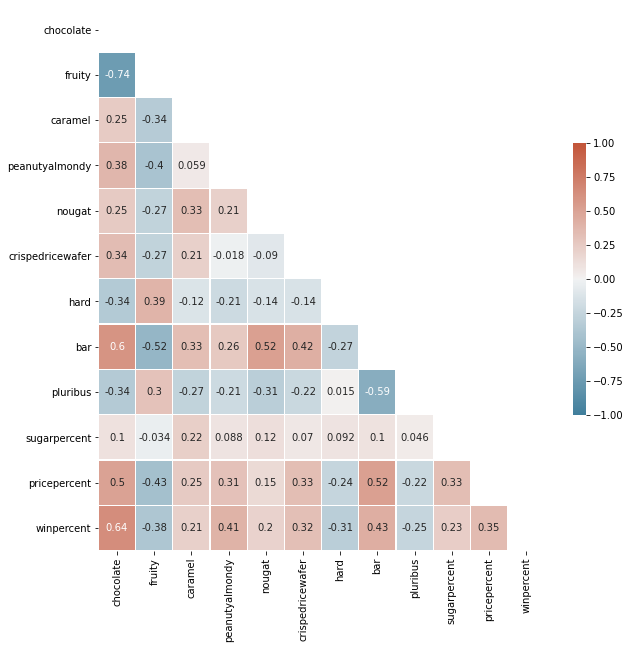

In [21]:
# Correlation matrix
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True, linewidths=.3, cbar_kws={"shrink": .5}) 

In [22]:
data_2 = data.drop(['competitorname'], axis=1)

# Get top univariate correlations
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(data_2, 10))

Top Absolute Correlations
chocolate  fruity          0.741721
           winpercent      0.636517
           bar             0.597421
bar        pluribus        0.593409
nougat     bar             0.522976
bar        pricepercent    0.518407
fruity     bar             0.515066
chocolate  pricepercent    0.504675
fruity     pricepercent    0.430969
bar        winpercent      0.429929
dtype: float64


In [23]:
correlations = data_2.corr().unstack().sort_values().drop_duplicates()
correlations

fruity          chocolate      -0.741721
bar             pluribus       -0.593409
                fruity         -0.515066
fruity          pricepercent   -0.430969
peanutyalmondy  fruity         -0.399280
                                  ...   
pricepercent    bar             0.518407
nougat          bar             0.522976
chocolate       bar             0.597421
                winpercent      0.636517
                chocolate       1.000000
Length: 67, dtype: float64

### Feature engineering

In [24]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [25]:
def bins(number):
    if number <= 0.2:
        return 0.2
    elif number <= 0.4:
        return 0.4
    elif number <= 0.6:
        return 0.6
    elif number <= 0.8:
        return 0.8
    else:
        return 1

In [26]:
data.sugarpercent = data.sugarpercent.apply(lambda x: bins(x))
data.pricepercent = data.pricepercent.apply(lambda x: bins(x))

In [27]:
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.8,1.0,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.8,0.6,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.2,0.2,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.2,0.6,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,1.0,0.6,52.341465


### Modell 

Schrittweise Regression:

 - Um die signifikanteste Variablen zu entdecken. 

 -  Bei jedem Schritt des Verfahrens wird die signifikanteste Variable hinzugefügt (vorwärts Variablenauswahl) oder die am wenigsten signifikante Variable entfernt (rückwärts Variablenauswahl).

### Ruckwärts Schrittweise Regression

alpha (Signifikanzniveau) = 0.05

Signifikanteste Variablen: 

1. Schokolade (beta = 32.33, aplha = 0.000)
2. Fruchtiger Geschmak (beta = 25.11, aplha = 0.000)
3. Nüsse (beta = 10.48, aplha = 0.025)
4. Zucker gehalt (beta = 17.97, aplha = 0.002)
5. Preis (beta = 17.75, aplha = 0.008)

In [28]:
import statsmodels.api as sm

X = data[['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus',
          'sugarpercent', 'pricepercent']]
y = data[['winpercent']]

In [29]:
x_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus',
          'sugarpercent', 'pricepercent']

def get_stats():
#    x = sm.add_constant(data[x_cols])
    x = data[x_cols]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()


                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              101.5
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    5.19e-40
Time:                        02:25:25   Log-Likelihood:                         -339.05
No. Observations:                  85   AIC:                                      700.1
Df Residuals:                      74   BIC:                                      727.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [30]:
x_cols.remove("nougat")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              113.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    4.87e-41
Time:                        02:25:25   Log-Likelihood:                         -339.08
No. Observations:                  85   AIC:                                      698.2
Df Residuals:                      75   BIC:                                      722.6
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [31]:
x_cols.remove("hard")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              126.9
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    4.71e-42
Time:                        02:25:25   Log-Likelihood:                         -339.22
No. Observations:                  85   AIC:                                      696.4
Df Residuals:                      76   BIC:                                      718.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [32]:
x_cols.remove("bar")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              142.8
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    5.96e-43
Time:                        02:25:25   Log-Likelihood:                         -339.72
No. Observations:                  85   AIC:                                      695.4
Df Residuals:                      77   BIC:                                      715.0
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [33]:
x_cols.remove("crispedricewafer")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              162.0
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    9.33e-44
Time:                        02:25:25   Log-Likelihood:                         -340.53
No. Observations:                  85   AIC:                                      695.1
Df Residuals:                      78   BIC:                                      712.2
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [34]:
x_cols.remove("caramel")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              185.1
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    2.19e-44
Time:                        02:25:25   Log-Likelihood:                         -341.85
No. Observations:                  85   AIC:                                      695.7
Df Residuals:                      79   BIC:                                      710.4
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [35]:
x_cols.remove("pluribus")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              217.9
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                    4.54e-45
Time:                        02:25:25   Log-Likelihood:                         -343.12
No. Observations:                  85   AIC:                                      696.2
Df Residuals:                      80   BIC:                                      708.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Weitere Analyse

 - Es gibt nur 1 Süßigkeit mit Schokolade und fruchtiger Geschmack.
 - Süßigkeiten mit Schokolade und Nüsse haben hohe Beliebtheit.
 - Gleicher Preis und Zucker wie die Süssigkeiten auf den 76% bzw. 68% Anteil.

In [36]:
### Es gibt nur 1 Süßigkeit mit Schokolade und fruchtiger Geschmack
data[data['chocolate'] == 1][data['fruity'] == 1]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
74,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.8,0.4,48.982651


In [37]:
### Süßigkeiten mit Schokolade und Nüsse haben hohe Beliebtheit
data[data['chocolate'] == 1][data['peanutyalmondy'] == 1]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.6,0.8,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.8,0.8,56.914547
32,Peanut butter M&MÕs,1,0,0,1,0,0,0,0,1,1.0,0.8,71.465050
40,Mr Good Bar,1,0,0,1,0,0,0,1,0,0.4,1.0,54.526451
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.8,0.8,70.735641
47,Peanut M&Ms,1,0,0,1,0,0,0,0,1,0.6,0.8,69.483788
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.2,0.4,81.866257
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.8,0.8,84.180290
53,ReeseÕs pieces,1,0,0,1,0,0,0,0,1,0.6,0.8,73.434990
54,ReeseÕs stuffed with pieces,1,0,0,1,0,0,0,0,0,1.0,0.8,72.887901


In [38]:
# Gleicher Preis und Zucker wie die Süssigkeiten auf 76% bzw. 68% Anteil.
data[data['winpercent'] > 70].mean()

chocolate            1.000000
fruity               0.000000
caramel              0.300000
peanutyalmondy       0.700000
nougat               0.200000
crispedricewafer     0.200000
hard                 0.000000
bar                  0.500000
pluribus             0.200000
sugarpercent         0.680000
pricepercent         0.760000
winpercent          76.275498
dtype: float64